#Books -

Aurélien Géron - Hands-On Machine Learning with Scikit-Learn and TensorFlow

Trent Hauck - scikit-learn Cookbook (2014, PacktPub)

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 7.0)

In [264]:
dataset = pd.read_csv('WineQuality.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [207]:
dataset.shape

(1599, 12)

In [159]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     3
total sulfur dioxide    0
density                 0
pH                      0
sulphates               1
alcohol                 0
quality                 0
dtype: int64

In [32]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1:]

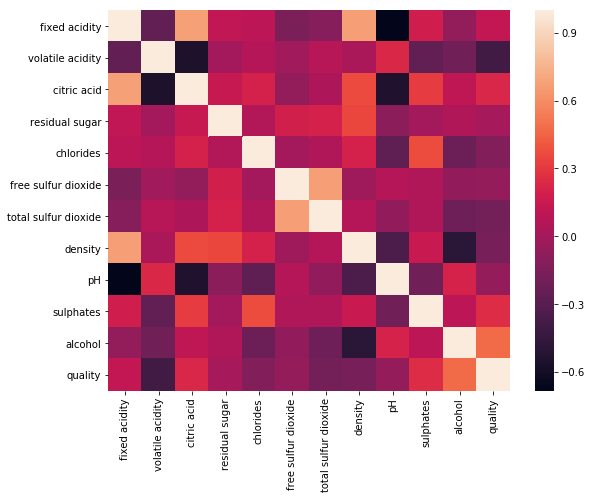

In [146]:
corr = dataset.corr()

sns.heatmap(corr)

In [105]:
y['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Outliers Detection

#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable

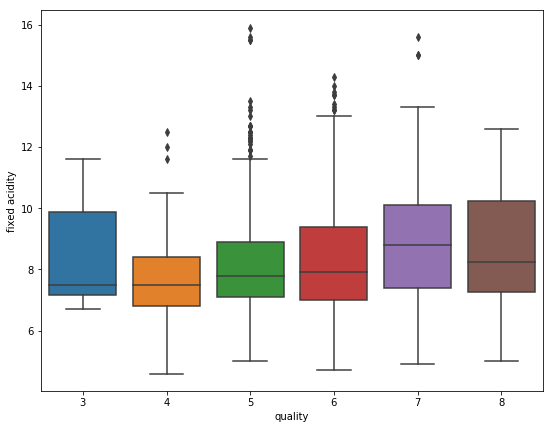

In [198]:
# 1. fixed acidity

sns.boxplot('quality', 'fixed acidity', data = dataset)

#### We will now create a generic method to remove all outliers


In [245]:
def remove_outliers(df, feature_name):
    lower_bound = .25
    upper_bound = .75
    
    Q3 = dataset.quantile(upper_bound)[feature_name]
    Q1 = dataset.quantile(lower_bound)[feature_name]
    
    IQR = Q3 - Q1
    print('IQR = {}'.format(IQR))
    
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    
    print('Upper Limit = {}'.format(upper_limit))
    print('Lowe Limit = {}'.format(lower_limit))
    
    df_cleaned = df[(df[feature_name] < upper_limit) & (dataset[feature_name] > lower_limit)]
    
    print('Removed {} outliers from dataset'.format(df.shape[0] - df_cleaned.shape[0]))
    
    return df_cleaned
   
    

In [247]:
dataset = remove_outliers(dataset, 'fixed acidity')

IQR = 2.0999999999999996
Upper Limit = 12.349999999999998
Lowe Limit = 3.95
Removed 49 outliers from dataset


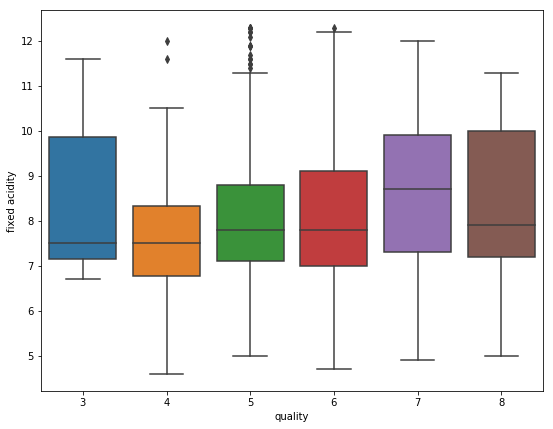

In [249]:
#Verifying boxplot after outlier removal
sns.boxplot('quality', 'fixed acidity', data = dataset)

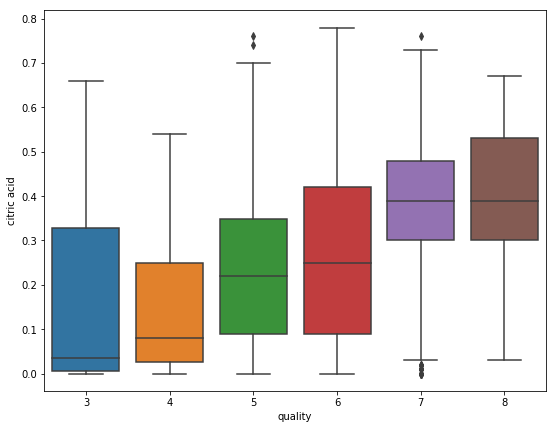

In [258]:
# 3. citric acid
sns.boxplot('quality', 'citric acid', data = dataset)

IQR = 0.31999999999999995
Upper Limit = 0.8899999999999999
Lowe Limit = -0.3899999999999999
Removed 1 outliers from dataset


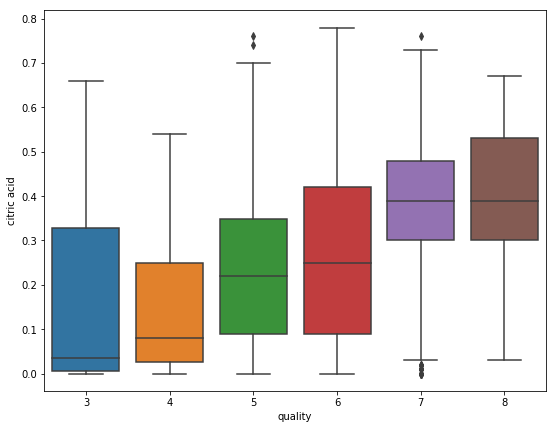

In [256]:
#Removing Outliers
dataset = remove_outliers(dataset, 'citric acid')
sns.boxplot('quality', 'citric acid', data = dataset)

#### If there are too many features with outliers, it is always better to iterate the process using a list containing all feature names.

In [263]:
for feature in col_list:
    print(feature)
    dataset = remove_outliers(dataset, feature)

fixed acidity
IQR = 2.0999999999999996
Upper Limit = 12.349999999999998
Lowe Limit = 3.95
Removed 49 outliers from dataset
volatile acidity
IQR = 0.245
Upper Limit = 1.0075
Lowe Limit = 0.027500000000000024
Removed 20 outliers from dataset
citric acid
IQR = 0.31999999999999995
Upper Limit = 0.8899999999999999
Lowe Limit = -0.3899999999999999
Removed 1 outliers from dataset
residual sugar
IQR = 0.7000000000000002
Upper Limit = 3.6500000000000004
Lowe Limit = 0.8499999999999996
Removed 138 outliers from dataset
chlorides
IQR = 0.019000000000000003
Upper Limit = 0.11750000000000002
Lowe Limit = 0.0415
Removed 102 outliers from dataset
free sulfur dioxide
IQR = 13.0
Upper Limit = 40.5
Lowe Limit = -11.5
Removed 28 outliers from dataset
total sulfur dioxide
IQR = 36.0
Upper Limit = 113.0
Lowe Limit = -31.0
Removed 52 outliers from dataset
density
IQR = 0.0020700000000000163
Upper Limit = 1.0006650000000001
Lowe Limit = 0.992385
Removed 20 outliers from dataset
pH
IQR = 0.18000000000000016
U

In [265]:
dataset.shape

(1599, 12)

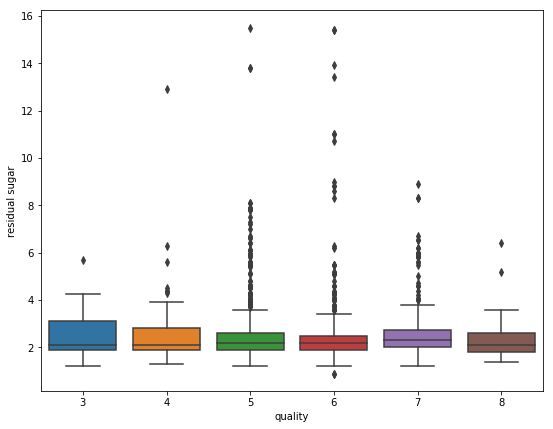

In [266]:
# 3. citric acid
sns.boxplot('quality', 'residual sugar', data = dataset)

# TODO
Find a fix to too many outliers detected for most of the features

In [125]:
#Removing Outliers from dataset
dataset = dataset[dataset['citric acid'] < 0.95 ]

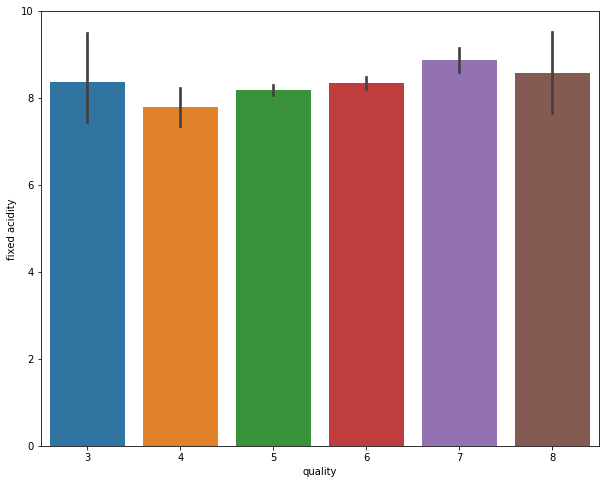

In [108]:
#Plotting quality against pH
sns.barplot(x='quality', y='fixed acidity', data=dataset)

In [79]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1596.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.885338,46.467792,0.996747,3.311113,0.658185,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.461873,32.895324,0.001887,0.154386,0.169554,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [259]:
col_list = list(X.columns)

print(col_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [78]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251519
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.054391
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. The
last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be
anything you like.


In [34]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [35]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [90]:
#Splitting into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

Now let's remove some features using pipeline.

Since Scikit-Learn does not provide any tranformer for Pandas DataFrames, we need to create a simple custom transformer.

In [91]:
#Custom Tranformer
from sklearn.base import BaseEstimator, TransformerMixin

class MyDataframeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, del_features):
        self.features_to_remove = del_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.features_to_remove, axis=1).copy()
        

In [97]:
#Tranforming using Pipelines

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('selector', MyDataframeSelector(['chlorides', 'residual sugar'])),
    ('imputer', SimpleImputer(strategy='median')),
    ('scalar', StandardScaler()),
    ('pca', PCA(n_components=9))
])

In [98]:
X_train_trans = pipeline.fit_transform(X_train)
X_test_trans = pipeline.transform(X_test)

In [99]:
#Pipleine's fit_tranform returns a numpy array, hence we need to reconvert it back to Dataframe

X_train_final = pd.DataFrame(X_train_trans)
X_test_final = pd.DataFrame(X_test_trans)

In [100]:
X_train_final.head()

,0,1,2,3,4,5,6,7,8
0,-0.959020,-0.123652,-0.572932,0.043275,0.152986,0.346494,-0.109164,0.548252,-0.461147
1,-0.172436,-0.669688,-2.359835,-0.901946,-1.200835,0.836761,0.710733,0.684677,0.348029
2,-1.443381,0.836744,-1.554501,-0.033495,0.190780,-0.544283,-0.324712,-0.188648,-0.625889
3,-1.999676,-1.183471,-0.654300,-0.251611,0.540430,-0.122625,0.233477,0.054095,-0.350301
4,-1.331374,0.720679,-0.807333,0.109905,-0.360338,-0.916529,-0.638134,-0.620914,0.912704


In [101]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores =[]
estimators = np.arange(10, 100, 10)

for n in estimators:
    classifier = RandomForestClassifier(n_estimators=n)
    classifier.fit(X_train_final, y_train.values.reshape(-1,))
    y_pred = classifier.predict(X_test_final)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)
print('The best accuracy ({}) is obtained when n_estimators = {}'.format(max(scores), estimators[scores.index(max(scores))]))

[0.6791666666666667, 0.6875, 0.6708333333333333, 0.6979166666666666, 0.6666666666666666, 0.68125, 0.6875, 0.69375, 0.7]
The best accuracy (0.7) is obtained when n_estimators = 90
